In [2]:
!pip install neo4j networkx matplotlib seaborn leidenalg

In [3]:
from neo4j import GraphDatabase
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import leidenalg as la
import igraph as ig

In [4]:
class Neo4jConnection:
    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def query(self, query, parameters=None):
        with self.driver.session() as session:
            return session.run(query, parameters).data()

# Replace with your Neo4j credentials
uri = "neo4j+s://4ec5c2b0.databases.neo4j.io"  # Update with your host
user = "neo4j"  # Username
password = "kJsI9hcuzSqYb4wO-eIJRrZ1ss0zF1HhFjQlVcGce2k"  # Password
conn = Neo4jConnection(uri, user, password)

In [6]:
def fetch_graph_data():
    query = """
    MATCH (n)-[r]->(m)
    RETURN id(n) AS source, id(m) AS target
    """
    results = conn.query(query)
    edges = [(row['source'], row['target']) for row in results]
    return edges

edges = fetch_graph_data()
G = nx.DiGraph()
G.add_edges_from(edges)

In [ ]:
"""
Final plots

1. Betweenness Centrality
2. Transitive Relationships
3. Scale free network structure
4. Clustering Coefficient
5. Leiden Algo (Community)

"""

In [13]:
# 1. Betweenness Centrality
def plot_betweenness_centrality(G):
    centrality = nx.betweenness_centrality(G)
    plt.figure(figsize=(8, 5))
    plt.hist(list(centrality.values()), bins=30, color="blue", alpha=0.7)
    plt.title("Distribution of Betweenness Centrality", fontsize=14)
    plt.xlabel("Betweenness Centrality", fontsize=12, fontweight="bold")
    plt.ylabel("Frequency", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.savefig("betweenness_centrality.pdf", format="pdf", dpi=300)
    plt.show()

plot_betweenness_centrality(G)

In [8]:
# 2. Transitive Relationships
def plot_transitivity(G):
    transitivity = nx.transitivity(G)
    print(f"Global Transitivity (Clustering Coefficient): {transitivity}")
    plt.figure(figsize=(6, 4))
    plt.bar(["Transitivity"], [transitivity], color="green", alpha=0.7)
    plt.title("Global Transitivity (Clustering Coefficient)", fontsize=14)
    plt.ylabel("Value", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.savefig("transitivity.pdf", format="pdf", dpi=300)
    plt.show()

plot_transitivity(G)

Global Transitivity (Clustering Coefficient): 0


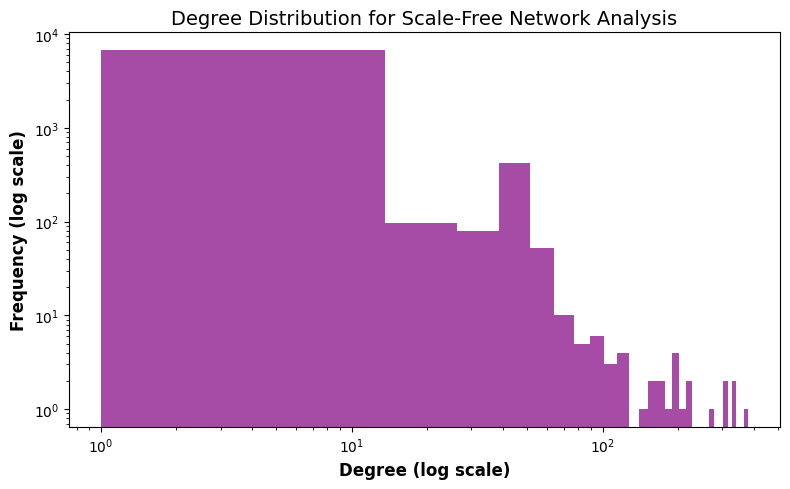

In [15]:
# 3. Scale-Free Network Structure (Degree Distribution)
def plot_degree_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.figure(figsize=(8, 5))
    plt.hist(degrees, bins=30, color="purple", alpha=0.7)
    plt.yscale("log")
    plt.xscale("log")
    plt.title("Degree Distribution for Scale-Free Network Analysis", fontsize=14)
    plt.xlabel("Degree (log scale)", fontsize=12, fontweight="bold")
    plt.ylabel("Frequency (log scale)", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.savefig("degree_distribution.pdf", format="pdf", dpi=300)
    plt.show()

plot_degree_distribution(G)

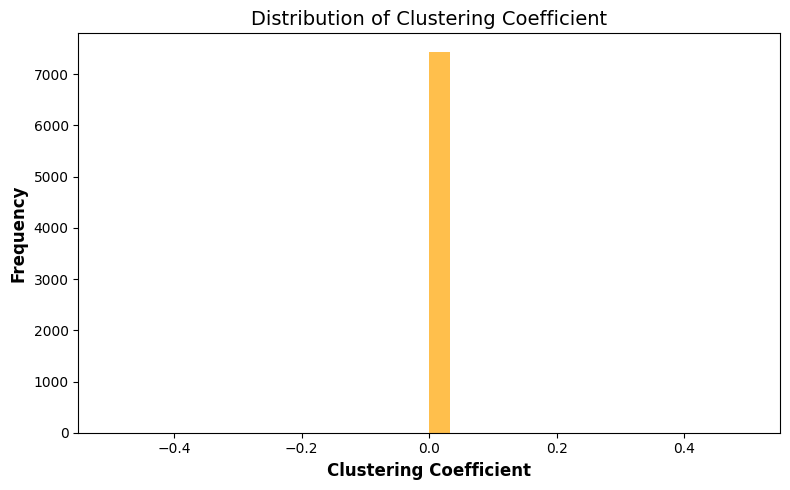

In [10]:
# 4. Clustering Coefficient
def plot_clustering_coefficient(G):
    clustering = nx.clustering(G)
    plt.figure(figsize=(8, 5))
    plt.hist(list(clustering.values()), bins=30, color="orange", alpha=0.7)
    plt.title("Distribution of Clustering Coefficient", fontsize=14)
    plt.xlabel("Clustering Coefficient", fontsize=12, fontweight="bold")
    plt.ylabel("Frequency", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.savefig("clustering_coefficient.pdf", format="pdf", dpi=300)
    plt.show()


plot_clustering_coefficient(G)

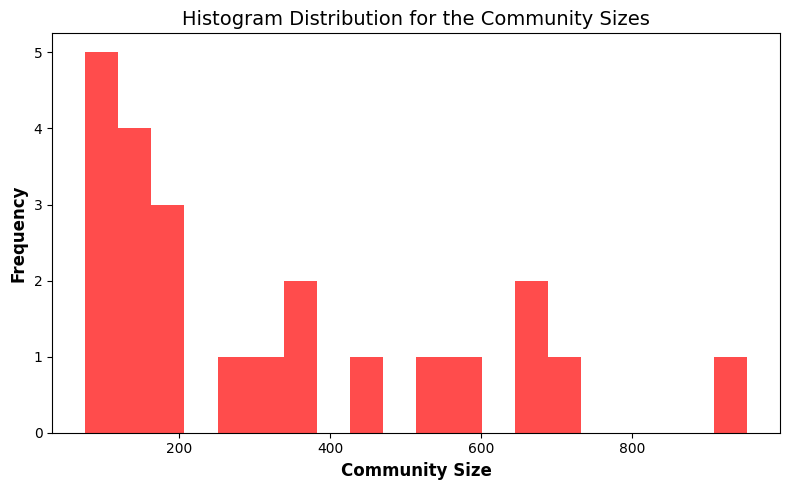

In [14]:
# 5. Leiden Algorithm for Community Detection
def plot_leiden_communities(G):
    ig_graph = ig.Graph.TupleList(G.edges(), directed=True)
    partitions = la.find_partition(ig_graph, la.ModularityVertexPartition)
    community_sizes = [len(c) for c in partitions]
    plt.figure(figsize=(8, 5))
    plt.hist(community_sizes, bins=20, color="red", alpha=0.7)
    plt.title("Histogram Distribution for the Community Sizes", fontsize=14)
    plt.xlabel("Community Size", fontsize=12, fontweight="bold")
    plt.ylabel("Frequency", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.savefig("leiden_communities.pdf", format="pdf", dpi=300)
    plt.show()


plot_leiden_communities(G)

In [16]:
conn.close()